In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pwd

'/home/saade/mlelec'

In [3]:
import torch
import numpy as np
import ase
from ase.io import read
import json
from ase.units import Hartree
import hickle

In [4]:
torch.set_default_dtype(torch.float64) # Set default dtype og torch to avoid numerical errors

In [5]:
pwd

'/home/saade/mlelec'

In [6]:
fock_ethane = np.load('examples/data/ethane/b3lypg_def2tzvp/focks.npy')
print(fock_ethane.shape)
fock_ethane = list(fock_ethane)

(1000, 98, 98)


In [7]:
fock_ethene = np.load('examples/data/ethene/b3lypg_def2tzvp/focks.npy')
for i in fock_ethene:
    fock_ethane.append(i)

In [8]:
len(fock_ethane)

2000

In [9]:
fock_butadiene = np.load('examples/data/butadiene/b3lypg_def2tzvp/focks.npy')
for j in fock_butadiene:
    fock_ethane.append(j)

In [11]:
fock_hexane = np.load('examples/data/hexane/b3lypg_def2tzvp/focks.npy')
for k in fock_hexane:
    fock_ethane.append(k)

In [13]:
fock_hexatriene = np.load('examples/data/hexatriene/b3lypg_def2tzvp/focks.npy')
for l in fock_hexatriene:
    fock_ethane.append(l)

In [14]:
fock_styrene = np.load('examples/data/styrene/b3lypg_def2tzvp/focks.npy')
for m in fock_styrene:
    fock_ethane.append(m)

In [16]:
fock_isoprene = np.load('examples/data/isoprene/b3lypg_def2tzvp/focks.npy')
for n in fock_isoprene:
    fock_ethane.append(n)

In [17]:
len(fock_ethane)

7000

In [19]:
hickle.dump(fock_ethane, 'focks_def2tzvp.hickle')

In [33]:
pwd

'/home/saade/mlelec'

In [34]:
fock_sto3g = hickle.load('examples/data/acs/sto-3g/fock.hickle')

In [35]:
fock_sto3g

array([array([[-1.10287235e+01, -2.97307584e+00,  1.26402649e-05,
                9.59114410e-04,  9.83287056e-04, -7.46190931e-05,
               -3.68791632e-01,  6.11527567e-01, -1.71061518e-02,
               -3.50142009e-02, -7.59476925e-01, -6.98046471e-01,
               -7.63527408e-01, -7.29098430e-02, -6.30632776e-02,
               -6.51314020e-02],
              [-2.97307584e+00, -1.56991936e+00, -3.87624070e-02,
                1.85531363e-02,  1.78212156e-02, -3.68713784e-01,
               -5.89808851e-01,  5.60205643e-01, -1.58798560e-02,
               -2.98912107e-02, -7.38127947e-01, -6.99121693e-01,
               -7.39380977e-01, -1.85203189e-01, -1.70525319e-01,
               -1.70143738e-01],
              [ 1.26402649e-05, -3.87624070e-02, -3.30902190e-01,
               -7.40045069e-04,  1.13233545e-02, -6.11414740e-01,
               -5.59548291e-01,  3.16602369e-01, -1.57888080e-02,
               -2.66762422e-02,  1.22698573e-01,  1.55125498e-01,
          

In [36]:
fock_sto3g.shape

(7000,)

In [20]:
ovlp = hickle.load('examples/data/acs/sto-3g/overlap.hickle')

In [21]:
len(ovlp)

7000

In [25]:
ovlp_ethane = np.load('examples/data/ethane/b3lypg_def2tzvp/ovlps.npy')
ovlp_ethane = list(ovlp_ethane)

In [26]:
ovlp_ethene = np.load('examples/data/ethene/b3lypg_def2tzvp/ovlps.npy')
for i in ovlp_ethene:
    ovlp_ethane.append(i)

In [27]:
ovlp_butadiene = np.load('examples/data/butadiene/b3lypg_def2tzvp/ovlps.npy')
for j in ovlp_butadiene:
    ovlp_ethane.append(j)

In [28]:
ovlp_hexane = np.load('examples/data/hexane/b3lypg_def2tzvp/ovlps.npy')
for k in ovlp_hexane:
    ovlp_ethane.append(k)

In [29]:
ovlp_hexatriene = np.load('examples/data/hexatriene/b3lypg_def2tzvp/ovlps.npy')
for l in ovlp_hexatriene:
    ovlp_ethane.append(l)

In [30]:
ovlp_styrene = np.load('examples/data/styrene/b3lypg_def2tzvp/ovlps.npy')
for m in ovlp_styrene:
    ovlp_ethane.append(m)

In [31]:
ovlp_isoprene = np.load('examples/data/isoprene/b3lypg_def2tzvp/ovlps.npy')
for n in ovlp_isoprene:
    ovlp_ethane.append(n)

In [32]:
len(ovlp_ethane)

7000

In [33]:
hickle.dump(ovlp_ethane, 'ovlps_def2tzvp.hickle')

In [34]:
orbs = hickle.load('examples/data/acs/sto-3g/orbitals.hickle')

In [35]:
orbs

{6: [[1, 0, 0], [2, 0, 0], [2, 1, -1], [2, 1, 0], [2, 1, 1]], 1: [[1, 0, 0]]}

In [55]:
file = open("examples/data/ethane/b3lypg_def2tzvp/orbs.json", "r")

In [57]:
file = json.load(file)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [4]:
from mlelec.data.dataset import MoleculeDataset

In [5]:
molecule_data = MoleculeDataset(
    mol_name = "ethane",
    use_precomputed = True,
    path = "examples/data/ethane",
    aux_path = "examples/data/ethane/sto-3g",
    frame_slice = slice(0, 200),
    device = "cpu",
    aux = ["overlap", "orbitals", "ovlp_nscf", "orbs_nscf"],
    target = ["fock", "fock_nscf"],
)

Loading structures
examples/data/ethane/sto-3g/fock.hickle
examples/data/ethane/sto-3g/fock_nscf.hickle


In [6]:
from src.mlelec.utils.learning_utils import instantiate_mf

Using PyTorch backend.


In [7]:
from mlelec.data.dataset import MLDataset

In [8]:
ml_data = MLDataset(
    molecule_data = molecule_data,
    device = "cpu",
    model_strategy = "coupled",
    shuffle = True,
    shuffle_seed = 5380,
)

In [9]:
ml_data._split_indices(train_frac=0.7, val_frac=0.2, test_frac=0.1)

In [10]:
all_mfs, fockvars = instantiate_mf(
        ml_data,
        fock_predictions = molecule_data.target['fock'],
        batch_indices = list(range(len(ml_data.structures))),
    )


In [11]:
from mlelec.features.acdc import compute_features_for_target
from mlelec.data.dataset import get_dataloader

In [12]:
hypers = {
            "cutoff": 5.0,
            "max_radial" : 6,
            "max_angular": 4,
            "atomic_gaussian_width": 0.3,
            "center_atom_weight": 1,
            "radial_basis": {"Gto": {}},
            "cutoff_function": {"ShiftedCosine": {"width": 0.1}},
        }

ml_data._set_features(compute_features_for_target(ml_data, device = "cpu", hypers = hypers))

In [13]:
train_dl, val_dl, test_dl = get_dataloader(ml_data, model_return="tensor", batch_size=10)

# RidgeCV Model

In [14]:
from src.mlelec.models.linear import LinearTargetModel

### Fitting a RidgeCV model

In [15]:
model = LinearTargetModel(dataset = ml_data, nlayers = 1, nhidden = 16, bias = False, device = "cpu")

In [16]:
from typing import Optional, List, Union, Tuple, Dict

def isqrtm(A: torch.Tensor) -> torch.Tensor:
    eva, eve = torch.linalg.eigh(A)
    idx = eva > 1e-15
    return eve[:, idx] @ torch.diag(eva[idx] ** (-0.5)) @ eve[:, idx].T

def isqrtp(A: torch.Tensor) -> torch.Tensor:
    eva, eve = torch.linalg.eigh(A)
    idx = eva > 1e-15
    return eve[:, idx] @ torch.diag(eva[idx] ** (0.5)) @ eve[:, idx].T


def _lowdin_orthogonalize(
    fock: torch.Tensor, ovlp: torch.Tensor
) -> Tuple[torch.Tensor, torch.Tensor]:
    ovlp_i12 = isqrtm(ovlp)
    return torch.einsum("ij,jk,kl->il", ovlp_i12, fock, ovlp_i12)

In [17]:
H = ml_data.molecule_data.target["fock"][0]
S = ml_data.molecule_data.aux_data["overlap"][0]

In [18]:
from xitorch.linalg import symeig
import xitorch
Hx = xitorch.LinearOperator.m(H)
Sx = xitorch.LinearOperator.m(S)
eval, mo_coeff = symeig(Hx, M = Sx)

In [19]:
from scipy.linalg import sqrtm

In [20]:
def compute_mulliken(ml_data, focks, indices):
    # We access the basis written as a dictionary from ml_data
    basis = ml_data.molecule_data.aux_data['orbitals']
    # We access the ase frames for each structure in the batch
    batch_frames = [ml_data.structures[i] for i in indices]
    # We access the Fock matrices for each structure in the batch
    batch_fock = unfix_orbital_order(
        focks, batch_frames, ml_data.molecule_data.aux_data["orbitals"]
    )
    # We access the overlap matrices for each structure in the batch
    batch_overlap = ml_data.molecule_data.aux_data["overlap"][indices] 
    
    #ortho_focks = [_lowdin_orthogonalize(f, o) for f, o in zip(batch_fock, batch_overlap)]
    # S_sqrt = []
    eva = []
    rho_list = []
    pop = []
    density_matrices = []
    for a in range(len(focks)):
        
        Hx = xitorch.LinearOperator.m(batch_fock[a])
        Sx = xitorch.LinearOperator.m(batch_overlap[a])
        eval, mo_coeff = symeig(Hx, M = Sx)
        #eval, mo_coeff = torch.linalg.eigh(ortho_focks[a])
        
        eva.append(eval)
        frame = batch_frames[a]
        S_sqrt = isqrtp(batch_overlap[a])
        # Define the single particle density matrix
        half_nelec = frame.numbers.sum() // 2
        mo_occ = torch.zeros(mo_coeff.shape[1])
        mo_occ[:half_nelec] = 2
        mocc = mo_coeff[:,mo_occ>0]
        dm = (mocc*mo_occ[mo_occ>0]) @ (mocc.conj().T)
        
        natm = len(frame)
        # rho = torch.zeros((len(indices), natm, natm))
        # for i in range(len(indices)):
        rho = S_sqrt @ dm @ S_sqrt
        rho_list.append(rho)
        density_matrices.append(dm)
        P = []
        d = torch.zeros((natm, natm))
        for i in range(natm):
            i_start = int(np.sum([len(basis[s]) for s in frame.numbers[0:i]]))
            i_end = i_start + len(basis[frame.numbers[i]])
            for j in range(natm):
                j_start = int(np.sum([len(basis[s]) for s in frame.numbers[0:j]]))
                j_end = j_start + len(basis[frame.numbers[j]])
                #d[i, j] = torch.norm(dm[i_start:i_end, j_start:j_end])
                d[i, j] = torch.norm(rho[i_start:i_end, j_start:j_end])
            #x = rho[i_start:i_end, j_start:j_end]
            #P_uu = torch.trace(x)
            #P.append(P_uu)
        #pop.append(P)
        P.append(d)
                # rho[i,j] = torch.sum(S_sqrt[a] @ dm[i_start:i_end, j_start:j_end] @ S_sqrt[a])
        
    return torch.stack(eva), torch.stack(rho_list), torch.stack(P), torch.stack(density_matrices)

## Indirect learning of eigenvalues via bacprop

In [21]:
import os
os.environ["PYSCFAD_BACKEND"] = "torch"
import torch
from torch.autograd.functional import jacobian
from pyscf import gto
from pyscfad import numpy as pynp
from pyscfad import ops
from pyscfad.ml.scf import hf
import pyscf.pbc.tools.pyscf_ase as pyscf_ase
from mlelec.data.pyscf_calculator import _instantiate_pyscf_mol
from mlelec.utils.twocenter_utils import fix_orbital_order, unfix_orbital_order
from tqdm import tqdm

In [22]:
from cmath import inf
best = inf
early_stop_criteria = 100

In [23]:
# Do this only if you want to start your indirect training from the Ridge fitted weights
pred_train = model.forward(ml_data.feat_train, return_type="tensor", batch_indices=ml_data.train_idx)

In [24]:
import mlelec.metrics as mlmetrics

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.8, patience=20, verbose=True
)

val_interval = 10
loss_fn = getattr(mlmetrics, "L2_loss") 
losses = []
early_stop_count = 0
nepochs = 10000

/home/saade/miniconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [25]:
iterator = tqdm(range(nepochs))

for epoch in iterator:
    model.train(True)
    train_loss = 0
    loss_H_epoch = 0
    losses_H = []
    for data in train_dl:
        optimizer.zero_grad()
        idx = data["idx"]

        #forward pass
        pred = model(data["input"], return_type="tensor", batch_indices=idx)
        targ = ml_data.target.tensor[idx]
    
        loss = loss_fn(pred, targ) 
        
        loss_H_epoch += loss.item()
        train_loss += loss.item()
        
        # backward pass
        loss.backward(retain_graph = True)
        optimizer.step()
        
    losses_H.append(loss_H_epoch)
    
    losses.append(train_loss)
    scheduler.step(train_loss)
    
    model.train(False)

    if epoch % val_interval == 0:
        val_loss = 0
        for i, data in enumerate(val_dl):
            idx = data["idx"]
            val_pred = model(data["input"], return_type="tensor", batch_indices=idx)
            val_targ = ml_data.target.tensor[idx]
            
            vloss = loss_fn(val_pred, val_targ)
            val_loss += vloss.item()
            
        new_best = val_loss < best
        if new_best:
            best = val_loss
            torch.save(model.state_dict(), 'best_model_dipole.pt')
            early_stop_count = 0
        else:
            early_stop_count += 1
        if early_stop_count > early_stop_criteria:
            print(f"Early stopping at epoch {epoch}")
            print(f"Epoch {epoch}, train loss {train_loss/len(ml_data.train_idx)}")

            print(f"Epoch {epoch} val loss {val_loss/len(ml_data.val_idx)}")
            # Save last best model
            break

    if epoch % 1 == 0:
        iterator.set_postfix(train_loss = train_loss/len(ml_data.train_idx), 
                             Val_loss = val_loss/len(ml_data.val_idx),
                            H_loss = loss_H_epoch)
        #print('loss_eval = ', loss_eval, 'loss_P', loss_P)
        

 48%|████████████████████████████████████████████████████▎                                                       | 4844/10000 [18:46:42<19:59:16, 13.96s/it, H_loss=0.0202, Val_loss=0.000164, train_loss=0.000144]


KeyboardInterrupt: 

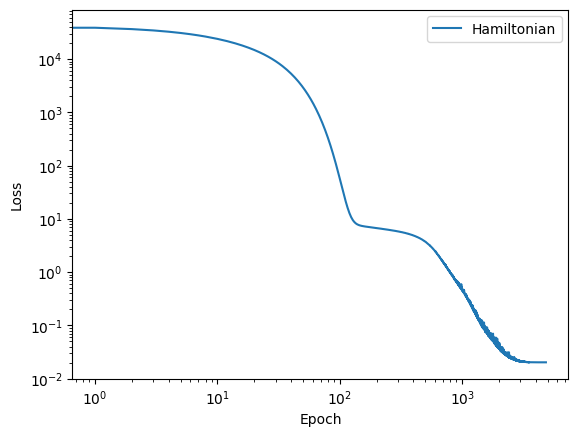

In [26]:
from matplotlib import pyplot as plt
plt.loglog(losses, label = "Hamiltonian")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [27]:
from IPython.utils import io

In [28]:
with io.capture_output() as captured:
    test_fock_predictions = model.forward(
        ml_data.feat_test, return_type="tensor", batch_indices=ml_data.test_idx,
    )

In [29]:
test_eva_pred_ind, test_rho_list_pred_ind, test_P_pred_ind, test_dm_pred_ind = compute_mulliken(ml_data, test_fock_predictions, ml_data.test_idx)
test_eva_ref, test_rho_list_ref, test_P_ref, test_dm_ref = compute_mulliken(ml_data, ml_data.target.tensor[ml_data.test_idx], ml_data.test_idx)

In [30]:
error1 = loss_fn(test_eva_pred_ind, test_eva_ref) / len(ml_data.test_idx)
error1

tensor(0.0002, grad_fn=<DivBackward0>)

In [31]:
print("Test RMSE on MO energies after indirect learning on eigenvalues {:.5f} eV ".format(torch.sqrt(error1/16)*Hartree))

Test RMSE on MO energies after indirect learning on eigenvalues 0.09664 eV 


In [32]:
error2 = loss_fn(test_P_pred_ind, test_P_ref) / len(ml_data.test_idx)
error2

tensor(3.1453e-07, grad_fn=<DivBackward0>)

In [33]:
print("Test RMSE on MO energies after indirect learning on P {:.5f} eV ".format(torch.sqrt(error2/16)*Hartree))

Test RMSE on MO energies after indirect learning on P 0.00382 eV 


In [34]:
error3 = loss_fn(test_rho_list_pred_ind, test_rho_list_ref)/len(ml_data.test_idx)

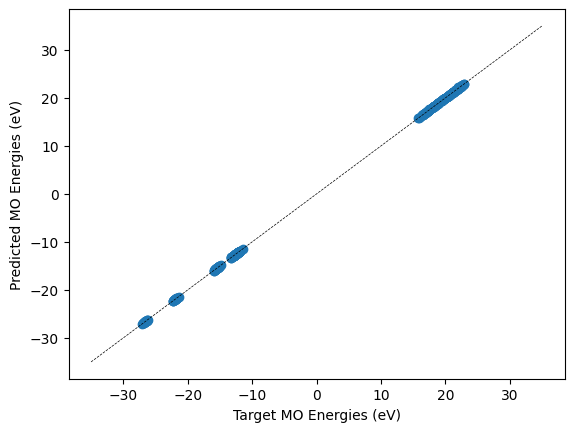

In [35]:
x = test_eva_ref.detach().numpy()  * Hartree
y = test_eva_pred_ind.detach().numpy()  * Hartree

x = x[x>-50]
y = y[y>-50]
plt.scatter(x,y)
    
plt.plot([-35,35], [-35,35], linestyle='--', color='black', linewidth=0.5)
plt.xlabel('Target MO Energies (eV)')
plt.ylabel('Predicted MO Energies (eV)')
plt.show()

In [36]:
loss_fn(test_P_ref, test_P_pred_ind)

tensor(6.6050e-06, grad_fn=<SumBackward0>)

In [37]:
loss_fn(test_eva_ref, test_eva_pred_ind)

tensor(0.0042, grad_fn=<SumBackward0>)

In [38]:
loss_fn(test_rho_list_ref, test_rho_list_pred_ind)

tensor(0.0006, grad_fn=<SumBackward0>)

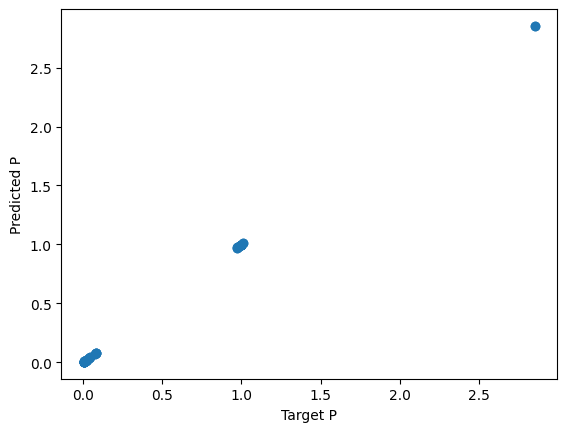

In [39]:
x = test_P_ref.detach().numpy().flatten() # * Hartree
y = test_P_pred_ind.detach().numpy().flatten() # * Hartree

# x = x[x>-50]
# y = y[y>-50]
plt.scatter(x,y)
    
# plt.plot([-35,35], [-35,35], linestyle='--', color='black', linewidth=0.5)
plt.xlabel('Target P')
plt.ylabel('Predicted P')
plt.show()

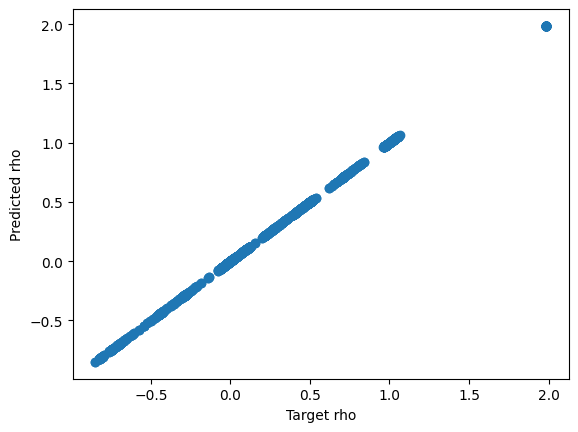

In [40]:
x = test_rho_list_ref.detach().numpy().flatten() # * Hartree
y = test_rho_list_pred_ind.detach().numpy().flatten() # * Hartree

# x = x[x>-50]
# y = y[y>-50]
plt.scatter(x,y)
    
# plt.plot([-35,35], [-35,35], linestyle='--', color='black', linewidth=0.5)
plt.xlabel('Target rho')
plt.ylabel('Predicted rho')
plt.show()